In [36]:
import pandas as pd
import plotly.express as px
import json

In [86]:
# The name and lat/long for the city to render
city = "Chicago"
lat = 41.8781
lon = -87.6298

In [87]:
df = pd.read_csv("../../data/final/redlining.csv")
df

,state,city,holc_grade,name,geometry
0,AL,Birmingham,A,Mountain Brook Estates and Country Club Garden...,"[[[[-86.756777, 33.497543], [-86.75692, 33.495..."
1,AL,Birmingham,A,"Redmont Park, Rockridge Park, Warwick Manor, a...","[[[[-86.758669, 33.509329], [-86.760927, 33.50..."
2,AL,Birmingham,A,"Colonial Hills, Pine Crest (outside city limits)","[[[[-86.756777, 33.497543], [-86.751964, 33.50..."
3,AL,Birmingham,B,"Grove Park, Hollywood, Mayfair, and Edgewood s...","[[[[-86.801113, 33.480713], [-86.800994, 33.48..."
4,AL,Birmingham,B,Best section of Woodlawn Highlands,"[[[[-86.749227, 33.533325], [-86.749156, 33.53..."
...,...,...,...,...,...
8873,WV,Wheeling,D,D4,"[[[[-80.719853, 40.063757], [-80.717885, 40.06..."
8874,WV,Wheeling,D,D5,"[[[[-80.728542, 40.067287], [-80.728369, 40.06..."
8875,WV,Wheeling,D,D6,"[[[[-80.722164, 40.061337], [-80.722563, 40.06..."
8876,WV,Wheeling,D,D7,"[[[[-80.647403, 40.048863], [-80.648454, 40.04..."


In [88]:
df_city = df[df["city"] == city]
features = [
    {
        "type": "Feature",
        "properties": {"name": str(i)},
        "geometry": {
            "type": "Polygon",
            "coordinates": json.loads(g)[0] if isinstance(g, str) else [],
        },
        "id": str(i),
    }
    for i, g in enumerate(df_city["geometry"])
]
features[0]

{'type': 'Feature',
 'properties': {'name': '0'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-87.830536, 42.253606],
    [-87.831847, 42.25531],
    [-87.831497, 42.255482],
    [-87.831206, 42.255914],
    [-87.830973, 42.256474],
    [-87.830769, 42.259515],
    [-87.831002, 42.260011],
    [-87.831468, 42.260119],
    [-87.832604, 42.260011],
    [-87.833508, 42.259709],
    [-87.834615, 42.259256],
    [-87.834848, 42.259666],
    [-87.83479, 42.260054],
    [-87.834119, 42.261175],
    [-87.833712, 42.262038],
    [-87.833566, 42.26538],
    [-87.83326, 42.265937],
    [-87.833027, 42.266239],
    [-87.832386, 42.26639],
    [-87.831949, 42.26639],
    [-87.831395, 42.266347],
    [-87.830783, 42.266261],
    [-87.830317, 42.266476],
    [-87.830084, 42.266886],
    [-87.829793, 42.267252],
    [-87.828977, 42.267058],
    [-87.82752, 42.267296],
    [-87.82653, 42.266088],
    [-87.825685, 42.264708],
    [-87.825161, 42.263113],
    [-87.824374, 42.261819],
    [-87.82

In [89]:
geo = {
    "type": "FeatureCollection",
    "features": features,
}

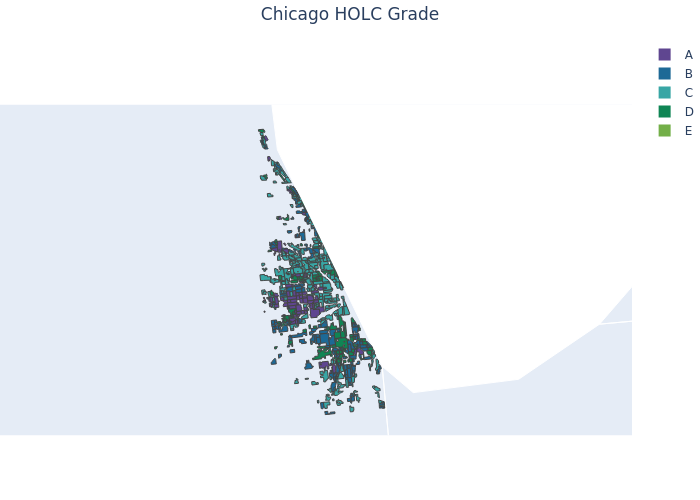

In [90]:
# Plot choropleth
fig = px.choropleth(
    df_city,
    geojson=geo,
    locations=df.index.astype("string"),
    color=df["holc_grade"],
    scope="usa",
    color_discrete_sequence=px.colors.qualitative.Prism,
    center={"lat": lat, "lon": lon},
    fitbounds="locations",
)

fig.update_layout(title_text=city + " HOLC Grade", title_x=0.5)
fig.layout.legend.title = ""
fig.update_layout(
    margin=dict(l=0, r=0, t=40, b=0),
)

fig.show("png")